# **Topic: 6 Logistic Regression**
**Course Code: CSST104**

**Name: Simon B. Sancon**

**Section: BSCS-3B**

# **Part 1. Data Loading and Preprocessing**

# **1. Load the Dataset:**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sne
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
online_food = pd.read_csv("onlinefoods.csv")
online_food.head(5)

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


# **2. Handle Missing Values**

In [ ]:
online_food_missing = online_food.isnull().sum()
print(online_food_missing)

Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


# **3. Encode Categorical Variables**

In [ ]:
online_food_dummies = pd.get_dummies(online_food, drop_first=True)
print(online_food_dummies.head(5))

   Age  Family size  latitude  longitude  Pin code  Gender_Male  \
0   20            4   12.9766    77.5993    560001            0   
1   24            3   12.9770    77.5773    560009            0   
2   22            3   12.9551    77.6593    560017            1   
3   22            6   12.9473    77.5616    560019            0   
4   22            4   12.9850    77.5533    560010            1   

   Marital Status_Prefer not to say  Marital Status_Single  \
0                                 0                      1   
1                                 0                      1   
2                                 0                      1   
3                                 0                      1   
4                                 0                      1   

   Occupation_House wife  Occupation_Self Employeed  ...  \
0                      0                          0  ...   
1                      0                          0  ...   
2                      0                    

# **4. Feature Selection**

In [ ]:
print(online_food_dummies.columns)
x = online_food_dummies.drop(["Output_Yes" ,"Unnamed: 12_Yes", "Feedback_Positive"], axis=1)
y = online_food_dummies["Feedback_Positive"]

Index(['Age', 'Family size', 'latitude', 'longitude', 'Pin code',
       'Gender_Male', 'Marital Status_Prefer not to say',
       'Marital Status_Single', 'Occupation_House wife',
       'Occupation_Self Employeed', 'Occupation_Student',
       'Monthly Income_25001 to 50000', 'Monthly Income_Below Rs.10000',
       'Monthly Income_More than 50000', 'Monthly Income_No Income',
       'Educational Qualifications_Ph.D',
       'Educational Qualifications_Post Graduate',
       'Educational Qualifications_School',
       'Educational Qualifications_Uneducated', 'Output_Yes',
       'Feedback_Positive', 'Unnamed: 12_Yes'],
      dtype='object')


# **Part 2: Exploratory Data Analysis(EDA)**

# **1. Discriptive statistics**

In [ ]:
online_food_stat = online_food.describe()
online_dummies_stat = online_food_dummies.describe()
print(online_food_stat)
print(online_dummies_stat)

              Age  Family size    latitude   longitude       Pin code
count  388.000000   388.000000  388.000000  388.000000     388.000000
mean    24.628866     3.280928   12.972058   77.600160  560040.113402
std      2.975593     1.351025    0.044489    0.051354      31.399609
min     18.000000     1.000000   12.865200   77.484200  560001.000000
25%     23.000000     2.000000   12.936900   77.565275  560010.750000
50%     24.000000     3.000000   12.977000   77.592100  560033.500000
75%     26.000000     4.000000   12.997025   77.630900  560068.000000
max     33.000000     6.000000   13.102000   77.758200  560109.000000
              Age  Family size    latitude   longitude       Pin code  \
count  388.000000   388.000000  388.000000  388.000000     388.000000   
mean    24.628866     3.280928   12.972058   77.600160  560040.113402   
std      2.975593     1.351025    0.044489    0.051354      31.399609   
min     18.000000     1.000000   12.865200   77.484200  560001.000000   
25%  

# **2. Visualizations**

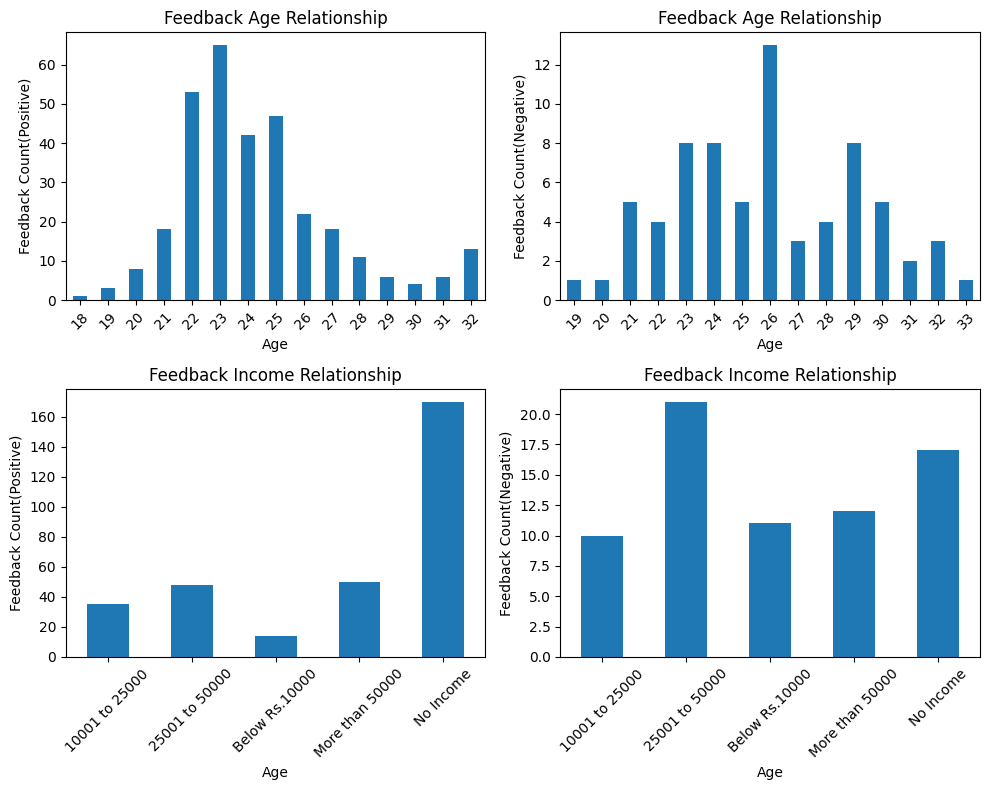

<ipython-input-11-5e64d0fd7372>:39: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sne.heatmap(online_food.corr())


<Figure size 800x600 with 0 Axes>

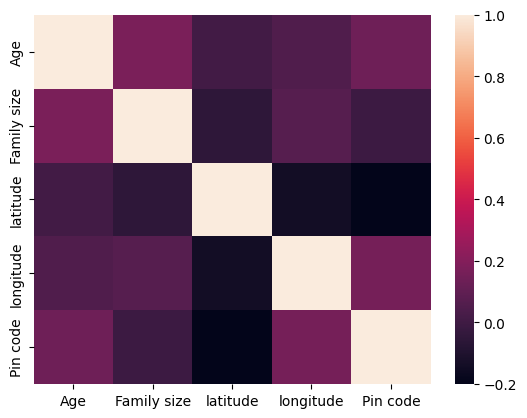

<Figure size 800x600 with 0 Axes>

In [ ]:
plt.subplot(2, 2, 1)
feedback_age_positive = online_food[online_food["Feedback"] == "Positive"].groupby("Age").size()
feedback_age_positive.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Feedback Count(Positive)")
plt.title("Feedback Age Relationship")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 2)
feedback_age_negative = online_food[online_food["Feedback"] == "Negative "].groupby("Age").size()
feedback_age_negative.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Feedback Count(Negative)")
plt.title("Feedback Age Relationship")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 3)
feedback_income_positive = online_food[online_food["Feedback"] == "Positive"].groupby("Monthly Income").size()
feedback_income_positive.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Feedback Count(Positive)")
plt.title("Feedback Income Relationship")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.subplot(2, 2, 4)
feedback_income_negative = online_food[online_food["Feedback"] == "Negative "].groupby("Monthly Income").size()
feedback_income_negative.plot(kind = "bar", figsize=(10,8))
plt.xlabel("Age")
plt.ylabel("Feedback Count(Negative)")
plt.title("Feedback Income Relationship")
plt.xticks(rotation = 45)
plt.tight_layout()

plt.show()

sne.heatmap(online_food.corr())
plt.figure(figsize=(8,6))



# **Part 3. Logistice Regression Model**

# **1. Build the Model**

**1.1 Spliting the Dataset**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

**1.2 Standardize the Features**

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

**1.3 Train the Logistice Regression Model**

In [ ]:
model = LogisticRegression()
model.fit(x_train_scaled,y_train)

LogisticRegression()

**1.4 Prediction on the test set**

In [ ]:
y_pred = model.predict(x_test_scaled)

# **2. Model Evaluation**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix: \n{conf_matrix}')
print(f'Classification Report: \n{class_report}')

Accuracy: 0.8589743589743589
Confusion Matrix: 
[[ 2  9]
 [ 2 65]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.50      0.18      0.27        11
           1       0.88      0.97      0.92        67

    accuracy                           0.86        78
   macro avg       0.69      0.58      0.59        78
weighted avg       0.83      0.86      0.83        78



# **Part 4: Feature Importance**

# **1. Feature Importance**

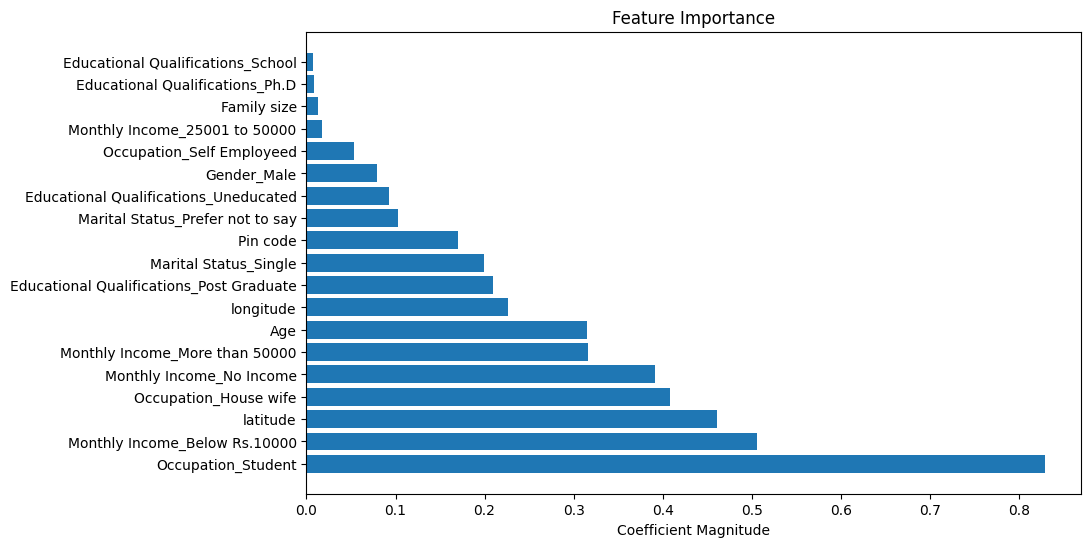

In [ ]:
feature_importance = pd.DataFrame(abs(model.coef_[0]), index=x.columns, columns=["Coefficient"])
feature_importance = feature_importance.sort_values(by="Coefficient", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance.index, feature_importance["Coefficient"])
plt.xlabel("Coefficient Magnitude")
plt.title("Feature Importance")
plt.show()


# **2. Prediction Insights**

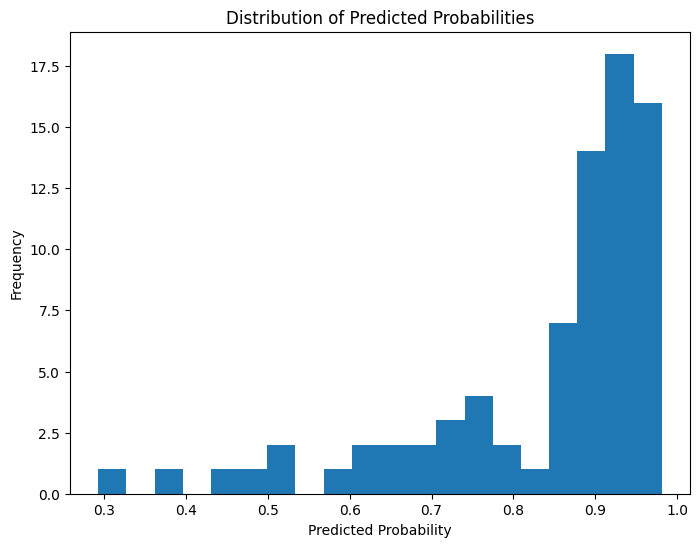


Based on the findings of the analysis
the social status such as (Monthly Income and Ocupation)
plays a major role in the variation of feedbacks next
to this was the variables Age, and location longitude and latitue




In [ ]:
prediction_prob = model.predict_proba(x_test_scaled)[:, 1]

plt.figure(figsize=(8, 6))
plt.hist(prediction_prob, bins=20)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Distribution of Predicted Probabilities")
plt.show()

print("""
Based on the findings of the analysis
the social status such as (Monthly Income and Ocupation)
plays a major role in the variation of feedbacks next
to this was the variables Age, and location longitude and latitue

""")